In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/jpn_can_best_of_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [2]:
# Define the subsets of data to analyze
df_canada = df[df['Country Name'].str.contains("Canada")]
df_japan = df[df['Country Name'].str.contains("Japan")]

In [3]:
# Canada Birth & Death Rate
can_birth_rate = df_canada[df_canada['Indicator Name'] == 'Birth rate, crude (per 1,000 people)'].iloc[:, 5:].T
can_death_rate = df_canada[df_canada['Indicator Name'] == 'Death rate, crude (per 1,000 people)'].iloc[:, 5:].T
can_birth_rate.columns = ['Birth Rate']
can_death_rate.columns = ['Death Rate']
can_birth_rate.index.name = 'Year'
can_death_rate.index.name = 'Year'
can_combined_bdr_data = can_birth_rate.join(can_death_rate)
can_combined_bdr_data.index = can_combined_bdr_data.index
can_bdr_filtered_data = can_combined_bdr_data[can_combined_bdr_data.index.astype(int) % 5 == 0]

In [4]:
# Japan Birth & Death Rate
jpn_birth_rate = df_japan[df_japan['Indicator Name'] == 'Birth rate, crude (per 1,000 people)'].iloc[:, 5:].T
jpn_death_rate = df_japan[df_japan['Indicator Name'] == 'Death rate, crude (per 1,000 people)'].iloc[:, 5:].T
jpn_birth_rate.columns = ['Birth Rate']
jpn_death_rate.columns = ['Death Rate']
jpn_birth_rate.index.name = 'Year'
jpn_death_rate.index.name = 'Year'
jpn_combined_bdr_data = jpn_birth_rate.join(jpn_death_rate)
jpn_combined_bdr_data.index = jpn_combined_bdr_data.index
jpn_bdr_filtered_data = jpn_combined_bdr_data[jpn_combined_bdr_data.index.astype(int) % 5 == 0]

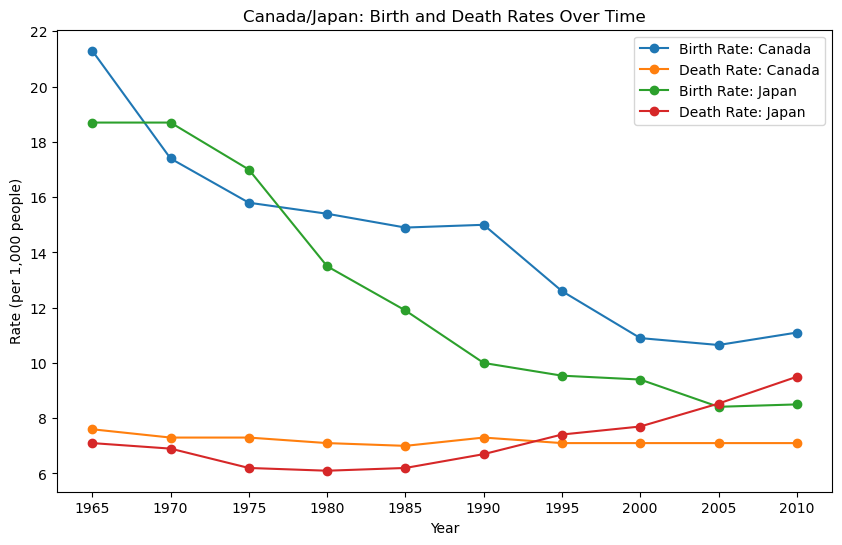

In [5]:
# Plot Birth & Death Rate data f/ Japan and Canada
plt.figure(figsize=(10, 6))
plt.plot(can_bdr_filtered_data['Birth Rate'], marker='o', label='Birth Rate: Canada')
plt.plot(can_bdr_filtered_data['Death Rate'], marker='o', label='Death Rate: Canada')
plt.plot(jpn_bdr_filtered_data['Birth Rate'], marker='o', label='Birth Rate: Japan')
plt.plot(jpn_bdr_filtered_data['Death Rate'], marker='o', label='Death Rate: Japan')
plt.title('Canada/Japan: Birth and Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (per 1,000 people)')
plt.legend()
plt.show()

In [6]:
# Canada Life Expectancy at Birth
can_life_expectancy_f_df = df_canada[df_canada['Indicator Name'] == 'Life expectancy at birth, female (years)'].iloc[:, 5:].T
can_life_expectancy_m_df = df_canada[df_canada['Indicator Name'] == 'Life expectancy at birth, male (years)'].iloc[:, 5:].T
can_life_expectancy_f_df.columns = ['Female Life Expectancy at Birth']
can_life_expectancy_m_df.columns = ['Male Life Expectancy at Birth']
can_life_expectancy_f_df.index.name = 'Years'
can_life_expectancy_m_df.index.name = 'Years'

can_combined_le_data = can_life_expectancy_f_df.join(can_life_expectancy_m_df)
can_combined_le_data.index = can_combined_le_data.index
can_filtered_le_data = can_combined_le_data[can_combined_le_data.index.astype(int) % 5 == 0]

In [7]:
# Japan Life Expectancy at Birth
jpn_life_expectancy_f_df = df_japan[df_japan['Indicator Name'] == 'Life expectancy at birth, female (years)'].iloc[:, 5:].T
jpn_life_expectancy_m_df = df_japan[df_japan['Indicator Name'] == 'Life expectancy at birth, male (years)'].iloc[:, 5:].T
jpn_life_expectancy_f_df.columns = ['Female Life Expectancy at Birth']
jpn_life_expectancy_m_df.columns = ['Male Life Expectancy at Birth']
jpn_life_expectancy_f_df.index.name = 'Years'
jpn_life_expectancy_m_df.index.name = 'Years'

jpn_combined_le_data = jpn_life_expectancy_f_df.join(jpn_life_expectancy_m_df)
jpn_combined_le_data.index = jpn_combined_le_data.index
jpn_filtered_le_data = jpn_combined_le_data[jpn_combined_le_data.index.astype(int) % 5 == 0]

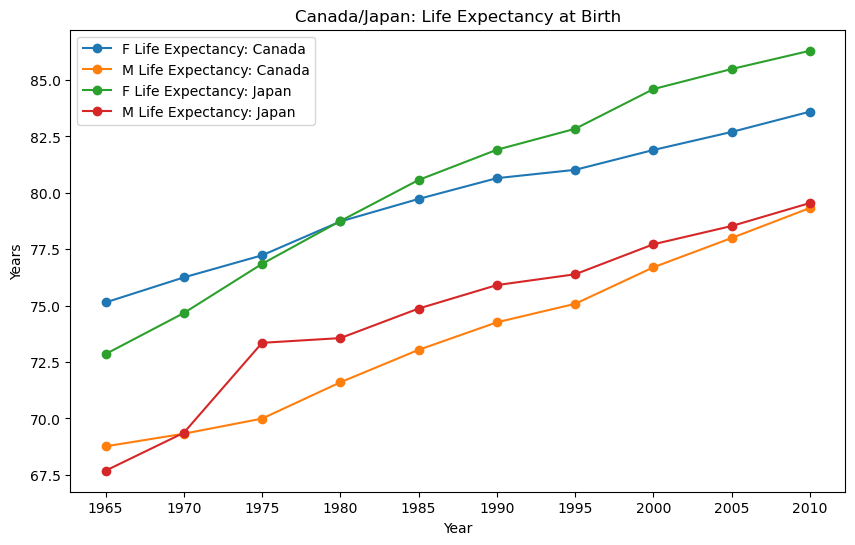

In [8]:
# Plot life expectancy f/ Canada & Japan
plt.figure(figsize=(10, 6))
plt.plot(can_filtered_le_data['Female Life Expectancy at Birth'], marker='o', label='F Life Expectancy: Canada')
plt.plot(can_filtered_le_data['Male Life Expectancy at Birth'], marker='o', label='M Life Expectancy: Canada')
plt.plot(jpn_filtered_le_data['Female Life Expectancy at Birth'], marker='o', label='F Life Expectancy: Japan')
plt.plot(jpn_filtered_le_data['Male Life Expectancy at Birth'], marker='o', label='M Life Expectancy: Japan')
plt.title('Canada/Japan: Life Expectancy at Birth')
plt.xlabel('Year')
plt.ylabel('Years')
plt.legend()
plt.show()

In [9]:
# Canada Survival To Age 65
can_survival_65_f_df = df_canada[df_canada['Indicator Name'] == "Survival to age 65, female (% of cohort)"].iloc[:, 5:].T
can_survival_65_m_df = df_canada[df_canada['Indicator Name'] == "Survival to age 65, male (% of cohort)"].iloc[:, 5:].T
can_survival_65_f_df.columns = ['% of Females to reach age 65']
can_survival_65_m_df.columns = ['% of Males to reach age 65']
can_survival_65_f_df.index.name = 'Percent'
can_survival_65_f_df.index.name = 'Percent'

can_combined_65_data = can_survival_65_f_df.join(can_survival_65_m_df)
can_combined_65_data.index = can_combined_65_data.index
can_filtered_65_data = can_combined_65_data[can_combined_65_data.index.astype(int) % 5 == 0]

In [10]:
# Japan Survival To Age 65
jpn_survival_65_f_df = df_japan[df_japan['Indicator Name'] == "Survival to age 65, female (% of cohort)"].iloc[:, 5:].T
jpn_survival_65_m_df = df_japan[df_japan['Indicator Name'] == "Survival to age 65, male (% of cohort)"].iloc[:, 5:].T
jpn_survival_65_f_df.columns = ['% of Females to reach age 65']
jpn_survival_65_m_df.columns = ['% of Males to reach age 65']
jpn_survival_65_f_df.index.name = 'Percent'
jpn_survival_65_f_df.index.name = 'Percent'

jpn_combined_65_data = jpn_survival_65_f_df.join(jpn_survival_65_m_df)
jpn_combined_65_data.index = jpn_combined_65_data.index
jpn_filtered_65_data = jpn_combined_65_data[jpn_combined_65_data.index.astype(int) % 5 == 0]

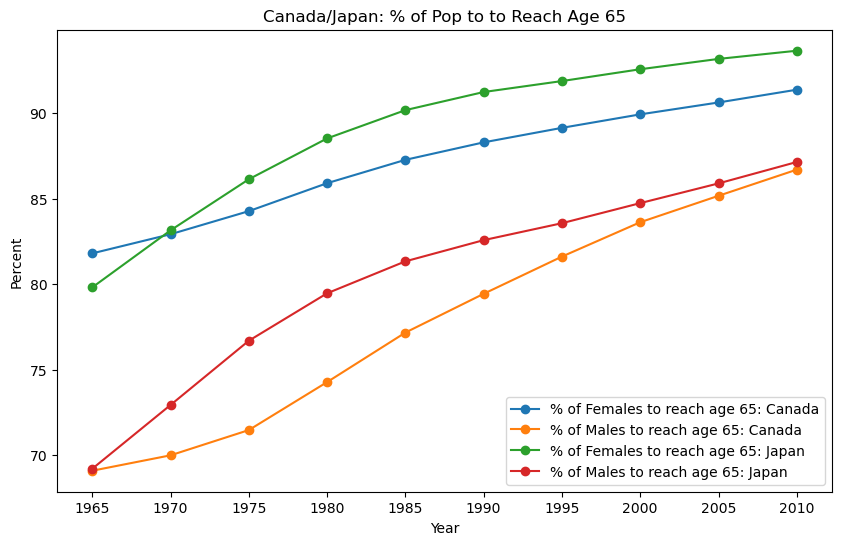

In [11]:
# Plot survival to age 65 f/ Canada & Japan
plt.figure(figsize=(10, 6))
plt.plot(can_filtered_65_data['% of Females to reach age 65'], marker='o', label='% of Females to reach age 65: Canada')
plt.plot(can_filtered_65_data['% of Males to reach age 65'], marker='o', label='% of Males to reach age 65: Canada')
plt.plot(jpn_filtered_65_data['% of Females to reach age 65'], marker='o', label='% of Females to reach age 65: Japan')
plt.plot(jpn_filtered_65_data['% of Males to reach age 65'], marker='o', label='% of Males to reach age 65: Japan')
plt.title('Canada/Japan: % of Pop to to Reach Age 65')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.show()

In [12]:
can_combined_65_le_data = can_filtered_le_data.join(can_filtered_65_data)
jpn_combined_65_le_data = jpn_filtered_le_data.join(jpn_filtered_65_data)

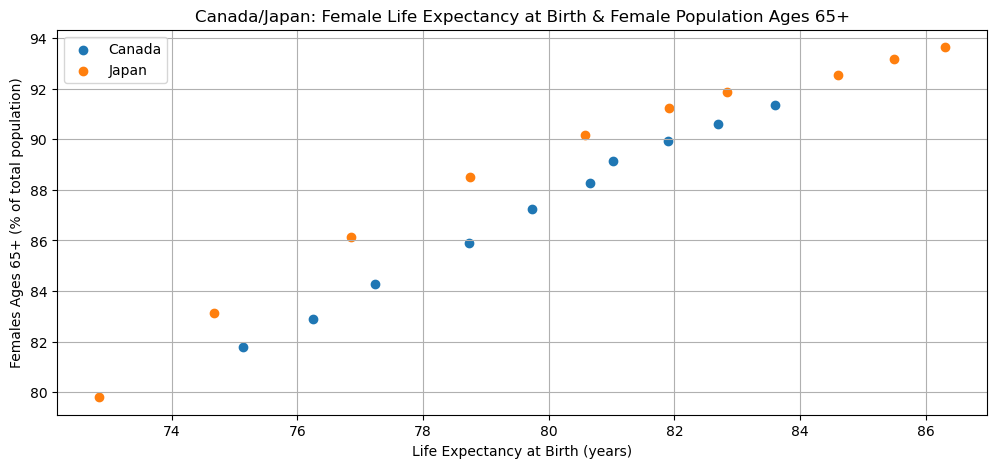

In [13]:
# Plot female life expectancy vs. survival to age 65+ f/ Canada & Japan
plt.figure(figsize=(12, 5))
plt.scatter(can_combined_65_le_data['Female Life Expectancy at Birth'], can_combined_65_le_data['% of Females to reach age 65'], marker='o', label='Canada')
plt.scatter(jpn_combined_65_le_data['Female Life Expectancy at Birth'], jpn_combined_65_le_data['% of Females to reach age 65'], marker='o', label='Japan')
plt.legend()
plt.title('Canada/Japan: Female Life Expectancy at Birth & Female Population Ages 65+')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Females Ages 65+ (% of total population)')
plt.grid(True)
plt.show()